## Used car pricing data:

#### The purpose of this analysis and model will be to identify whether used car prices can be predicted based on available data. This data will include price, year of sale, make/model, features and body style. 

#### Load the data

In [1]:
import pandas as pd
import numpy as np
from jupyterthemes import jtplot
jtplot.style(grid = False, ticks = True, figsize = (12,12))

In [2]:
df = pd.read_csv('C:/Users/cwnos/Documents/DSC680/Project 1/Datasets/Price Pred - 3.csv')
zipcodes = pd.read_csv('C:/Users/cwnos/Documents/DSC680/Project 1/Datasets/ZIP-COUNTY-FIPS_2017-06.csv')

In [3]:
df.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType
0,137178,7500,2020,786**,84430,Ford,Mustang,1988,LX,5.0L Gas V8,Sedan,0,RWD
1,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD
2,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD
3,80773,11600,2019,07852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD
4,64287,44000,2019,07728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD


In [4]:
###//* Determine age of vehicle - could impact price

df['Age'] = df['yearsold'] - df['Year']

df.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Age
0,137178,7500,2020,786**,84430,Ford,Mustang,1988,LX,5.0L Gas V8,Sedan,0,RWD,32
1,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD,61
2,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD,25
3,80773,11600,2019,07852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD,51
4,64287,44000,2019,07728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD,17


In [5]:
df.shape

(122144, 14)

In [6]:
###//* Sales prices are often impacted by location, a cursory look at the data shows inconsistency in the zipcode formatting. Additionally mapping zipcodes to state 
###//* will allow us to view trends by state easier. 
df = df[df['zipcode'].str.isdigit()==True]
df['zipcode'] = df['zipcode'].astype(int)

In [7]:
###//*Fortunately for my purposes I don't need the full zipcode dataset, only the zipcode and state will be used. We will be merging the dataframes next.  

zipcodes_df = zipcodes.groupby(by=['ZIP','STATE'], as_index = False).first()[['ZIP', 'STATE']]

zipcodes_df.head()

,ZIP,STATE
0,501,NY
1,601,PR
2,602,PR
3,603,PR
4,604,PR


In [8]:
df = pd.merge(df, zipcodes_df, left_on='zipcode', right_on='ZIP', how='left')
###//* Dropping ZIP column as it is now redundant. 
df.drop('ZIP', axis=1, inplace=True)

In [9]:
###//* Alright lets take a look at what we've got now. 
df.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Age,STATE
0,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD,61,CO
1,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD,25,FL
2,80773,11600,2019,7852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD,51,NJ
3,64287,44000,2019,7728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD,17,NJ
4,5250,70000,2019,7627,6500,Land Rover,Defender,1997,NaN,4.0 Liter Fuel Injected V8,NaN,0,4WD,22,NJ


In [10]:
###//* Indeed it looks like we've removed a good number of records here ~40000.  
df.shape

(82495, 15)

Now that we have the data we want to utilize, lets look at the cleaning needed (it's probably going to be a lot.)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="whitegrid")

C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


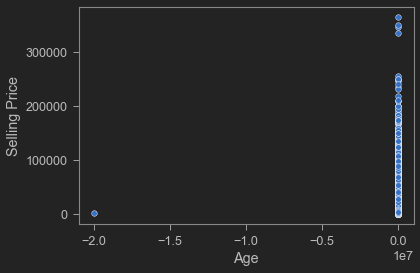

In [13]:
###//* Lets look at a scatterplot with age of vehicle and price

g = sns.scatterplot(df['Age'],df['pricesold'])
g.set(xlabel='Age', ylabel='Selling Price')
plt.show()

In [14]:
###//* Hmm, that looks odd, lets see if we can clean this up so it makes a little more sense
df[df['Age'] > 100]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Age,STATE
1144,27419,1640,2019,60048,0,Predator GSXR 750,Predator,1900,NaN,GSXR 750,NaN,0,NaN,119,IL
1665,19387,2030,2019,60178,0,Replica/Kit Makes,NaN,0,NaN,NaN,NaN,0,NaN,2019,IL
2218,22167,10000,2019,36093,64000,Mitsubishi,Delica L300,92,NaN,NaN,NaN,4,4WD,1927,AL
2300,53677,3050,2019,92596,0,VW/OTHER,NaN,0,NaN,YES,Convertible,4,RWD,2019,CA
2455,58688,5210,2019,14472,99100,BMW,3-Series,1008,NaN,NaN,Coupe,0,RWD,1011,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79888,47832,55000,2019,4760,1824,Other Makes,57,1916,NaN,electric,NaN,0,NaN,103,ME
80958,12817,6000,2019,53157,1200,Replica/Kit Makes,NaN,0,NaN,Chevy 2.0,Convertible,4,RWD,2019,WI
81348,71504,5300,2019,37617,99999,Studebaker,NaN,1913,Model 35,4 Cylinder Gravity Flow,Convertible,4,RWD,106,TN
82373,40319,5200,2019,72601,89250,Lancia,Other,1900,Convertible,2000cc FI,Convertible,4,FWD,119,AR


In [15]:
###//* There may be some missing or erronious data within the Year field, we should probably do something about that. 
df = df[df['Year']>0]
df.loc[df['Year']<100,['Year']] += 1900

df['Age'] = df['yearsold'] - df['Year']


C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


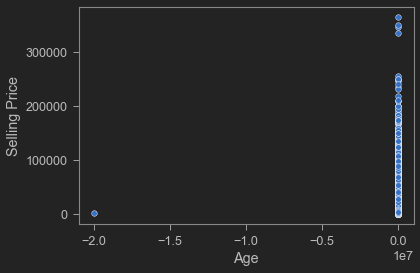

In [16]:
g = sns.scatterplot(df['Age'],df['pricesold'])
g.set(xlabel='Age', ylabel='Selling Price')
plt.show()

C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


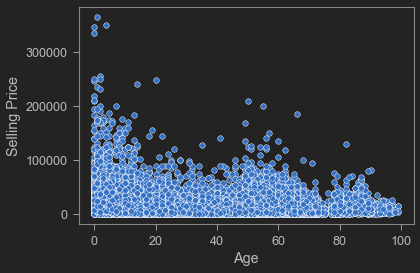

In [17]:
###/* It looks like we still have some issues here. The outliers may need to be eliminated, lets filter out results that are greater than 100 years old &
###/* those that are negative years old. 

df = df[df['Age']<100]
df = df[df['Age']>=0]
g = sns.scatterplot(df['Age'],df['pricesold'])
g.set(xlabel='Age', ylabel='Selling Price')
plt.show()

In [17]:
###//* Alright, lets talk about the elephant in the room. Exotic cars (those greater than 200k) are still bought and sold in any market. They can however skew the results
###//* being in the data as these sales/purchases are less about features and more about name/exclusivity. 

df[df['pricesold']>200000]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Age,STATE
9769,66493,235400,2019,64081,170,Ferrari,488,2018,Spider,3.9 L Twin Turbo V-8,Convertible,8,RWD,1,MO
19127,53152,247750,2019,77380,7915,Lamborghini,Diablo,1999,NaN,12,Coupe,0,NaN,20,TX
30288,33046,255100,2019,98121,377,Ferrari,488,2017,Spider,V8 turbo,Convertible,8,RWD,2,WA
31816,58962,246100,2019,11968,126,Rolls-Royce,Cullinan,2019,NaN,NaN,NaN,12,NaN,0,NY
31817,58864,345300,2019,11968,121,Rolls-Royce,Cullinan,2019,NaN,NaN,NaN,12,NaN,0,NY
34334,52754,333980,2019,77090,940,Rolls-Royce,Wraith,2019,NaN,6.6L V12 DGI DOHC 48V Twin Turbocharged,2dr Car,0,Coupe,0,TX
37334,10039,365000,2019,77005,36,Porsche,911,2018,GT2 RS,700 HP,Coupe,6,RWD,1,TX
47812,31907,210100,2019,61109,81900,Chevrolet,Nova,1969,NaN,427,Coupe,0,NaN,50,IL
48195,47188,230500,2019,84101,12656,McLaren,570,2017,S TheStradman's BabyMac,NaN,Coupe,8,RWD,2,UT
55560,90467,219000,2019,75225,586,Mercedes-Benz,G-Class,2019,G63,V8 TWIN TURBO,NaN,8,4WD,0,TX


In [18]:
df = df[df['pricesold']<400000]

C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


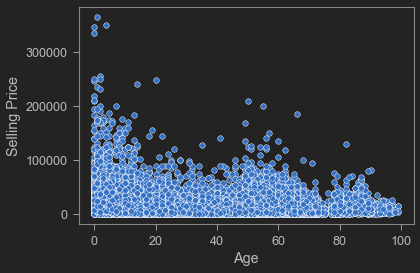

In [19]:
g = sns.scatterplot(df['Age'],df['pricesold'])
g.set(xlabel='Age', ylabel='Selling Price')
plt.show()

Price by Miles driven

C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


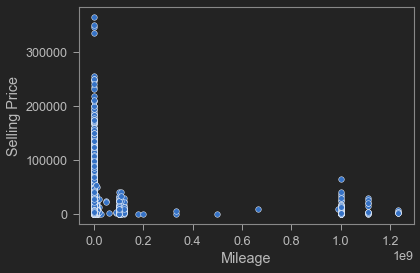

In [20]:
g = sns.scatterplot(df['Mileage'],df['pricesold'])
g.set(xlabel='Mileage', ylabel='Selling Price')
plt.show()

C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


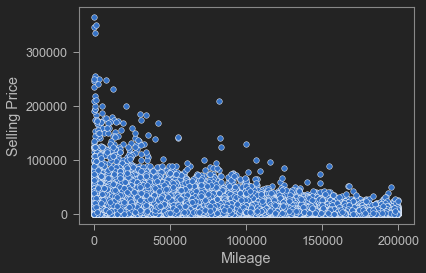

In [21]:
###//* Interesting, it is showing that there are many million mile vehicles, that probably isn't right either. 
df = df[df['Mileage']<200000]
g = sns.scatterplot(df['Mileage'],df['pricesold'])
g.set(xlabel='Mileage', ylabel='Selling Price')
plt.show()

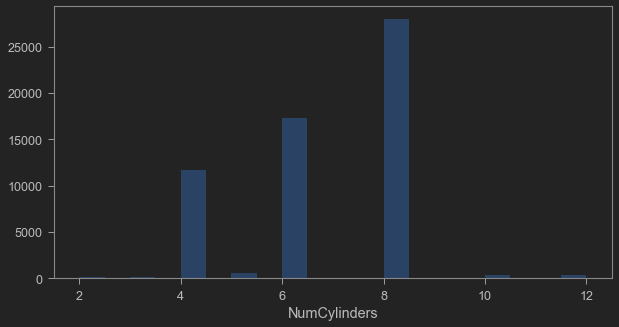

In [66]:
###//* Lets look at the number of cylinders 

sns.distplot(df['NumCylinders'],kde=False,bins=20)
plt.show()

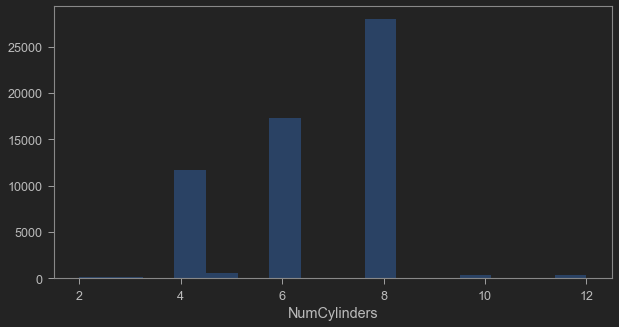

In [67]:
###//* Wow! I can't imagine a vehicle with 400 cylinders but it would be a sight to see. Of course there is the other possibility that we have some entry errors. Lets limit the number of cylinders to that of a Bugati. 
df = df[df['NumCylinders']<=16]
sns.distplot(df['NumCylinders'],kde=False,bins=16)
plt.show()

In [24]:
###//* Amazing, vehicles with zero cylinders. They must be Jet cars! No? You're right we should probably take a look at them. 
df[df['NumCylinders']<2]


,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,Age,STATE
4,5250,70000,2019,7627,6500,Land Rover,Defender,1997,NaN,4.0 Liter Fuel Injected V8,NaN,0,4WD,22,NJ
6,80293,25200,2019,33759,15000,Pontiac,GTO,1970,NaN,NaN,NaN,0,NaN,49,FL
18,116641,3020,2020,6810,94700,Jeep,Liberty,2011,NaN,NaN,NaN,0,NaN,9,CT
19,79126,17980,2019,11727,64020,Oldsmobile,442,1967,NaN,400 turbo engine,2 Door Hard Top,0,NaN,52,NY
29,9704,17000,2019,72223,0,Dodge,Other,1936,NaN,NaN,NaN,0,NaN,83,AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82461,31104,14800,2019,98226,15000,Packard,NaN,1956,NaN,NaN,NaN,0,NaN,63,WA
82462,118002,3550,2020,35051,100000,Chevrolet,Fleetmaster,1947,NaN,NaN,NaN,0,NaN,73,AL
82470,70536,3050,2019,20905,52000,Smart,Fortwo,2009,Passion,NaN,NaN,0,NaN,10,MD
82485,47179,4900,2019,95407,69132,Pontiac,GTO,1970,GTO,400 v8,NaN,0,RWD,49,CA


C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


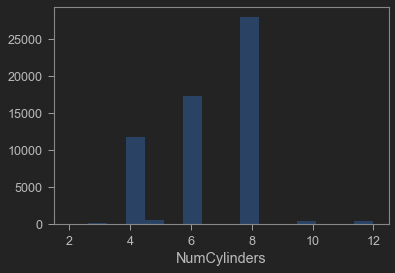

In [25]:
###//* While there is probably a way to map these entries to find their actual values, I'm not sure if there is any value to be added as it 
###//* looks like other there are multilple blank values in these entries, it might be better to remove them and move on. 
df = df[df['NumCylinders']>=2]
sns.distplot(df['NumCylinders'],kde=False,bins=16)
plt.show()

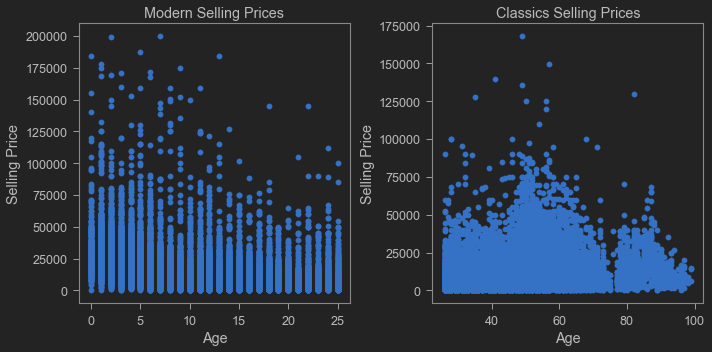

In [68]:
###//* Certainly Age of vehicle / historical status can factor into the vehicle price. It would stand to reason that newer vehicles depreciate over time while historical/classic vehicles appreciate. 
modern = df[df['Age'] <= 25]
classics = df[df['Age'] > 25]

plt.subplot(1, 2, 1)
plt.scatter(modern['Age'],modern['pricesold'])
plt.ylabel('Selling Price')
plt.xlabel('Age')
plt.title('Modern Selling Prices')
plt.subplot(1, 2, 2)
plt.scatter(classics['Age'],classics['pricesold'])
plt.ylabel('Selling Price')
plt.xlabel('Age')
plt.title('Classics Selling Prices')
plt.tight_layout()
plt.show()

In [27]:
###//* As expected newer vehicles prices go down over time and to an extent older vehicles (classics) tend to go up in value.
###//* Let's look at some more visuals. 

Sales by make

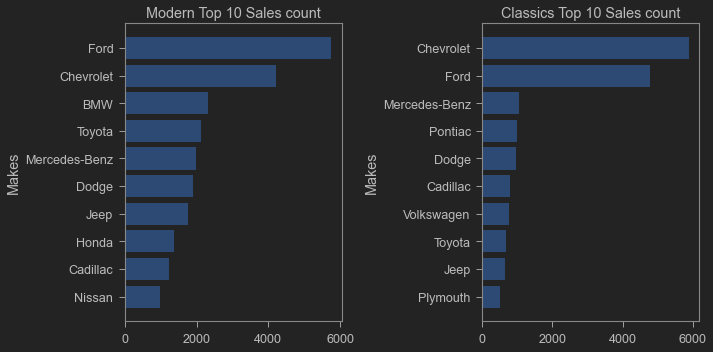

In [28]:
plt.rcParams["figure.figsize"] = [10,5]
plt.subplot(1, 2, 1)
makes = modern['Make'].value_counts(ascending=True).tail(10).index
y_pos = np.arange(len(makes))
salescount = modern['Make'].value_counts(ascending=True).tail(10).values 
plt.barh(y_pos, salescount, align='center', alpha=0.5)
plt.yticks(y_pos, makes)
plt.ylabel('Makes')
plt.title('Modern Top 10 Sales count')
plt.subplot(1, 2, 2)
makes = classics['Make'].value_counts(ascending=True).tail(10).index
y_pos = np.arange(len(makes))
salescount = classics['Make'].value_counts(ascending=True).tail(10).values 
plt.barh(y_pos, salescount, align='center', alpha=0.5)
plt.yticks(y_pos, makes)
plt.ylabel('Makes')
plt.title('Classics Top 10 Sales count')
plt.tight_layout()
plt.show()

Sales by State

In [29]:
states = df['STATE'].value_counts().index
salescount = df['STATE'].value_counts().values

In [30]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = [ dict(
        type='choropleth',
        locations = states,
        z = salescount, 
        locationmode = 'USA-states',
        colorbar = dict(
            title = "Salescount")
        ) ]

layout = dict(
    title = 'US used car sales by states',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa')
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

Top sales by Model

In [31]:
modern.groupby(by=['Make','Model','Year']).size().sort_values(ascending=False).head()

Make       Model    Year
Ford       Mustang  2007    93
Chevrolet  Equinox  2018    82
Ford       F-150    2018    79
                    2014    67
           Mustang  2004    65
dtype: int64

In [32]:
mileage = modern[(modern['Make'] == 'Ford') 
          & (modern['Model'] == 'Mustang') 
          & (modern['Year'] == 2007)]['Mileage']
salesprices = modern[(modern['Make'] == 'Ford') 
          & (modern['Model'] == 'Mustang') 
          & (modern['Year'] == 2007)]['pricesold']

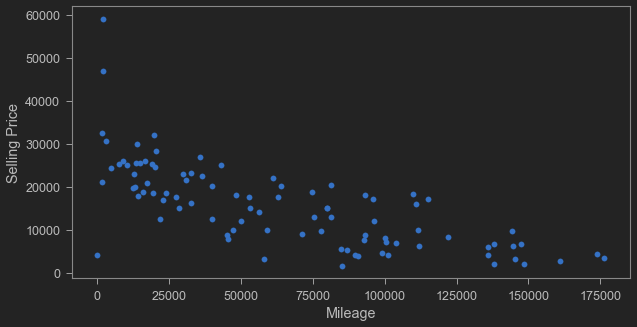

In [33]:
plt.scatter(mileage,salesprices)
plt.ylabel('Selling Price')
plt.xlabel('Mileage')
plt.show()

In [34]:
classics.groupby(by=['Make','Model','Year']).size().sort_values(ascending=False).head()

Make       Model    Year
Ford       Mustang  1966    248
                    1965    242
                    1967    190
Chevrolet  Camaro   1969    165
Ford       Mustang  1968    135
dtype: int64

In [35]:
mileage = classics[(classics['Make'] == 'Ford') 
          & (classics['Model'] == 'Mustang') 
          & (classics['Year'] == 1966)]['Mileage']
salesprices = classics[(classics['Make'] == 'Ford') 
          & (classics['Model'] == 'Mustang') 
          & (classics['Year'] == 1966)]['pricesold']

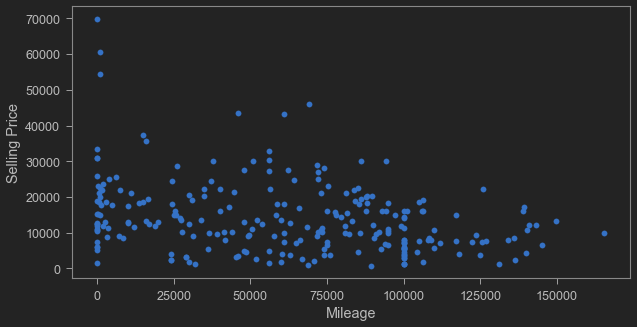

In [36]:
plt.scatter(mileage,salesprices)
plt.ylabel('Selling Price')
plt.xlabel('Mileage')
plt.show()

In [37]:
###//* It just so happens that my favorite model is the top selling in both groups, so naturally I support these results.

In [38]:
###//* Now that we're aquainted with the data lets look at some classification to with the goal of predicting price. 

In [39]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58551 entries, 0 to 82494
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            58551 non-null  int64 
 1   pricesold     58551 non-null  int64 
 2   yearsold      58551 non-null  int64 
 3   zipcode       58551 non-null  int32 
 4   Mileage       58551 non-null  int64 
 5   Make          58551 non-null  object
 6   Model         58375 non-null  object
 7   Year          58551 non-null  int64 
 8   Trim          38640 non-null  object
 9   Engine        50643 non-null  object
 10  BodyType      52457 non-null  object
 11  NumCylinders  58551 non-null  int64 
 12  DriveType     51494 non-null  object
 13  Age           58551 non-null  int64 
 14  STATE         58467 non-null  object
dtypes: int32(1), int64(7), object(7)
memory usage: 6.9+ MB


In [56]:
print('Unique Makes: ', len(pd.unique(df['Make'])))
print('Unique Models: ', len(pd.unique(df['Model'])))
print('Unique Trim: ', len(pd.unique(df['Trim'])))
print('Unique Engine: ', len(pd.unique(df['Engine'])))
print('Unique BodyType: ', len(pd.unique(df['BodyType'])))
print('Unique DriveType: ', len(pd.unique(df['DriveType'])))

Unique Makes:  224
Unique Models:  2333
Unique Trim:  15583
Unique Engine:  14929
Unique BodyType:  1600
Unique DriveType:  789


In [42]:
#Make = pd.get_dummies(df['Make'], drop_first = True)
#Model = pd.get_dummies(df['Model'], drop_first = True)
#Trim = pd.get_dummies(df['Trim'], drop_first = True)
#Engine = pd.get_dummies(df['Engine'], drop_first = True)
#BodyType = pd.get_dummies(df['BodyType'], drop_first = True)
#DriveType = pd.get_dummies(df['DriveType'], drop_first = True)
#State = pd.get_dummies(df['STATE'], drop_first = True)

In [43]:
#df.drop(['ID','Make', 'Model', 'Trim','Engine', 'BodyType', 'DriveType', 'STATE'], axis = 1, inplace=True)

In [44]:
#df.columns

In [45]:
#df= pd.concat([df[['pricesold', 'yearsold', 'zipcode', 'Mileage', 'Year', 'NumCylinders']]], axis = 1)

In [46]:
#print(df.columns)

In [47]:
#labels = pd.DataFrame(df['pricesold'])
#df = df.drop(['pricesold'], axis = 1)
#df = df.apply(pd.to_numeric)
#labels = labels.apply(pd.to_numeric)

In [48]:
#X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, random_state = 42)

In [49]:
#print('X_train: ',X_train.shape)
#print('X_test: ', X_test.shape)
#print('y_train: ', y_train.shape)
#print('y_test: ', y_test.shape)


In [50]:
###/* Fitting the model
###/* balanced argument for when number of rejects is higher than number of acceptance
#price_model = LinearRegression()



In [51]:
#price_model.fit(X_train, y_train)


In [52]:
#price_pred = price_model.predict(X_test)

In [53]:
#price_pred

In [54]:
#plt.plot(price_pred)
#plt.show()